In [32]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
airline = pd.read_csv("AirlinesData.csv")

In [34]:
airline.head(10)

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
5,Jun-95,135
6,Jul-95,148
7,Aug-95,148
8,Sep-95,136
9,Oct-95,119


In [35]:
airline.shape

(96, 2)

In [36]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [37]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [38]:
airline["Month"].unique()

array(['Jan-95', 'Feb-95', 'Mar-95', 'Apr-95', 'May-95', 'Jun-95',
       'Jul-95', 'Aug-95', 'Sep-95', 'Oct-95', 'Nov-95', 'Dec-95',
       'Jan-96', 'Feb-96', 'Mar-96', 'Apr-96', 'May-96', 'Jun-96',
       'Jul-96', 'Aug-96', 'Sep-96', 'Oct-96', 'Nov-96', 'Dec-96',
       'Jan-97', 'Feb-97', 'Mar-97', 'Apr-97', 'May-97', 'Jun-97',
       'Jul-97', 'Aug-97', 'Sep-97', 'Oct-97', 'Nov-97', 'Dec-97',
       'Jan-98', 'Feb-98', 'Mar-98', 'Apr-98', 'May-98', 'Jun-98',
       'Jul-98', 'Aug-98', 'Sep-98', 'Oct-98', 'Nov-98', 'Dec-98',
       'Jan-99', 'Feb-99', 'Mar-99', 'Apr-99', 'May-99', 'Jun-99',
       'Jul-99', 'Aug-99', 'Sep-99', 'Oct-99', 'Nov-99', 'Dec-99',
       'Jan-00', 'Feb-00', 'Mar-00', 'Apr-00', 'May-00', 'Jun-00',
       'Jul-00', 'Aug-00', 'Sep-00', 'Oct-00', 'Nov-00', 'Dec-00',
       'Jan-01', 'Feb-01', 'Mar-01', 'Apr-01', 'May-01', 'Jun-01',
       'Jul-01', 'Aug-01', 'Sep-01', 'Oct-01', 'Nov-01', 'Dec-01',
       'Jan-02', 'Feb-02', 'Mar-02', 'Apr-02', 'May-02', 'Jun-

<AxesSubplot:>

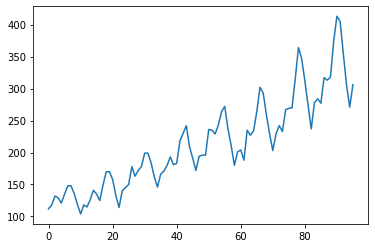

In [39]:
airline.Passengers.plot()

In [40]:
airline["Date"]=pd.to_datetime(airline.Month,format="%b-%y")
airline["Months"]=airline.Date.dt.strftime("%b")
airline["Year"]=airline.Date.dt.strftime("%Y")

<AxesSubplot:xlabel='Month', ylabel='Year'>

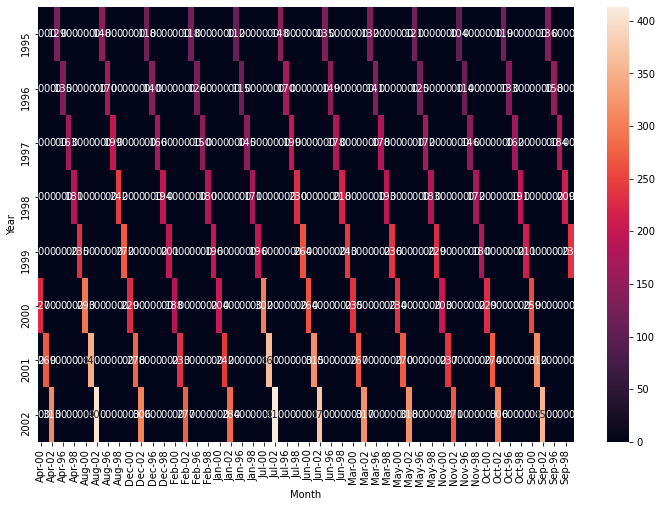

In [41]:
# Heatmap
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airline,values="Passengers",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

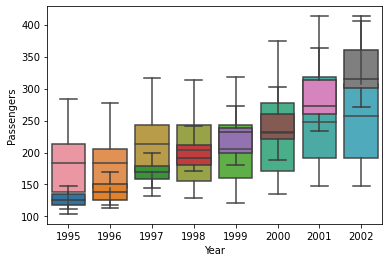

In [42]:
sns.boxplot(x="Months",y="Passengers",data=airline)
sns.boxplot(x="Year",y="Passengers",data=airline)

In [43]:
Month_Dummies = pd.DataFrame(pd.get_dummies(airline['Months']))
airline1 = pd.concat([airline,Month_Dummies],axis = 1)

In [44]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"]*airline1["t"]
airline1["Log_Passengers"] = np.log(airline1["Passengers"])

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

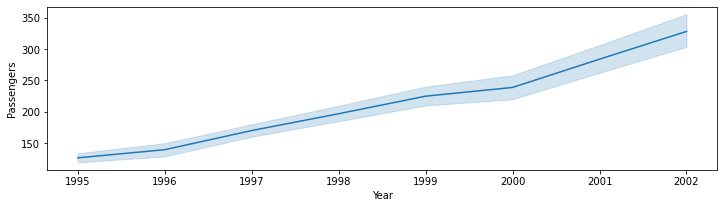

In [45]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=airline)

In [46]:
Train = airline1.head(80)
Test = airline1.tail(16)

<AxesSubplot:>

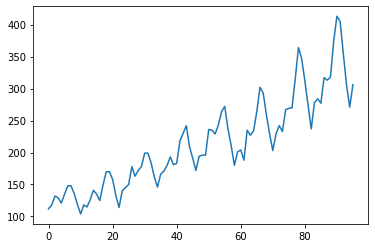

In [47]:
airline1.Passengers.plot()

In [48]:
# Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726734

In [49]:
# Exponential Model
Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334322

In [50]:
# Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.6544036958425

In [51]:
# Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443307

# Additive Seasonality Quadratic

In [52]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(Test))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570106755

# Multiplicative Seasonality

In [53]:
Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621102

# Multiplicative Additive Seasonality

In [54]:
Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.469000230304077

#Testing

In [55]:

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,47.542624
1,rmse_Exp,43.793739
2,rmse_Quad,43.654404
3,rmse_add_sea,129.266476
4,rmse_add_sea_quad,23.910984
5,rmse_Mult_sea,135.326484
6,rmse_Mult_add_sea,9.469000
